# Early Prediction of Chronic Kidney Disease Using Flask

Importing Libaries

In [ ]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c # return counts of number of classess
import matplotlib.pyplot as plt #used for data Visualization
import seaborn as sns #data visualization library
import missingno as msno #finding missing values
from sklearn.metrics import accuracy_score, confusion_matrix#model performance
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features
from sklearn.linear_model import LogisticRegression #Classification ML algorithm
import pickle #Python object hierarchy is converted into a byte stream

Loading the dataset

In [ ]:
data=pd.read_csv("CKD.csv") #loading the csv data

Data Pre-Processing

In [ ]:
data.head() #return you the first 5 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.tail() #return you the last 5 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


Dropping id column

In [ ]:
data.drop(["id"],axis=1,inplace=True) # drop is used for dropping the column

Renaming the Column Names

In [ ]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

Understanding the data type and its summary

In [ ]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [ ]:
data.describe() # computes summary values for continous column data

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Observing Target, Categorical and Numerical Columns

Target Column

In [ ]:
data['class'].unique() # find the unique elements of an array

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

Rectifying the Target Column

In [ ]:
data['class']=data['class'].replace("ckd\t","ckd") #replace is used for renaming
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object),
 array([11, 14], dtype=int64))

Categorical Columns

In [ ]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values) # only fetch the object type columns
print(catcols)

{'pedal_edema', 'packed_cell_volume', 'anemia', 'pus_cell_clumps', 'pus_cell', 'red_blood_cell_count', 'white_blood_cell_count', 'hypertension', 'class', 'bacteria', 'coronary_artery_disease', 'red_blood_cells', 'appetite', 'diabetesmellitus'}


In [ ]:
for i in catcols:
    print("Columns :",i)
    print(c(data[i])) #using counter for checking the number of classess in the column
    print('*'*120+'\n')

Columns : pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
************************************************************************************************************************

Columns : packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '23': 2, '19': 2, '16': 1, '\t?': 1, '14': 1, '18': 1, '17': 1, '15': 1, '21': 1, '20': 1, '\t43': 1, '9': 1})
************************************************************************************************************************

Columns : anemia
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

Columns : pus_cell_clumps
Counter({'notpresent': 354, 

Removing the Columns which are not Categorical

In [ ]:
catcols.remove('red_blood_cell_count') # remove is used for removing a particular column
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'pedal_edema', 'anemia', 'pus_cell_clumps', 'pus_cell', 'hypertension', 'class', 'bacteria', 'coronary_artery_disease', 'red_blood_cells', 'appetite', 'diabetesmellitus'}


Numerical Columns

In [ ]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)# only fetech the float and int type columns
#contcols=pd.DataFrame(data,columns=contcols)
print(contcols)

{'hemoglobin', 'potassium', 'specific_gravity', 'serum_creatinine', 'sugar', 'age', 'sodium', 'albumin', 'blood_urea', 'blood glucose random', 'blood_pressure'}


In [ ]:
for i in contcols:
    print("Continous Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns : hemoglobin
Counter({15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 14.7: 2, 16.6: 2, 16.7: 2, 16.8: 2, 15.1: 2, 17.1: 2, 17.2: 2, 17.4: 2, 5.6: 1, 7.6: 1, 7.7: 1, nan: 1, nan: 1, 12.9: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, nan: 1, nan: 1, 7.5: 1, nan: 1, nan: 1, 4.8: 1, nan: 1, nan: 1, 7.1: 1, nan: 1, nan: 1, nan: 1, 9.2: 1,

Removing the Columns which are not Numerrical

In [ ]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'hemoglobin', 'potassium', 'serum_creatinine', 'age', 'sodium', 'blood_urea', 'blood glucose random', 'blood_pressure'}


Adding columns which we found Continuous

In [ ]:
contcols.add('red_blood_cell_count') # using add we can add the column
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'packed_cell_volume', 'hemoglobin', 'potassium', 'red_blood_cell_count', 'serum_creatinine', 'white_blood_cell_count', 'age', 'sodium', 'blood_urea', 'blood glucose random', 'blood_pressure'}


Adding columns which we found Categrical

In [ ]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'pedal_edema', 'anemia', 'pus_cell_clumps', 'pus_cell', 'specific_gravity', 'hypertension', 'sugar', 'class', 'bacteria', 'coronary_artery_disease', 'albumin', 'red_blood_cells', 'appetite', 'diabetesmellitus'}


Rectifying the Categorical Columns Classes

In [ ]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no') # replacing \tno with no
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [ ]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

Null Values

In [ ]:
data.isnull().any() #it will return true if any columns is having null values

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [ ]:
data.isnull().sum() #returns the count of null values present in each column

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

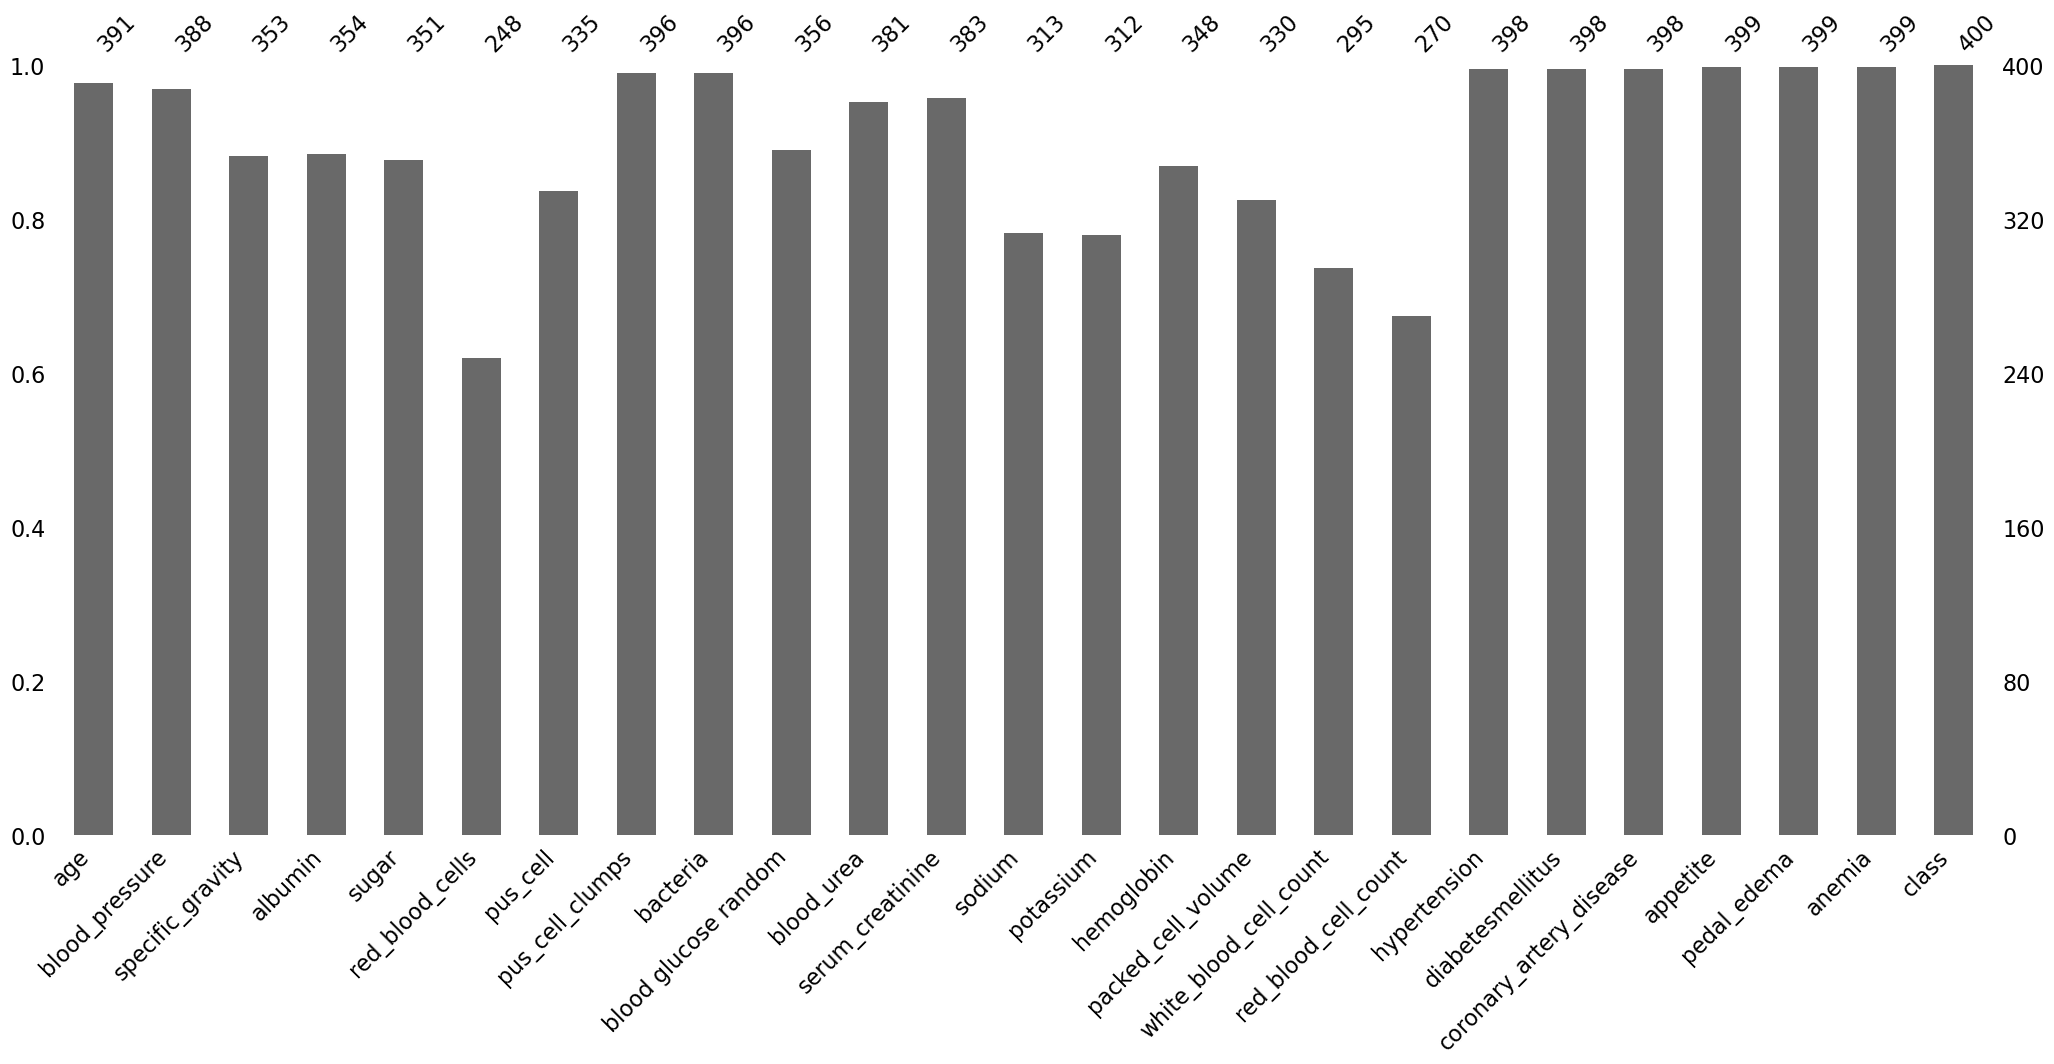

In [ ]:
#sns.heatmap(data.isnull(), cbar=False) #using seaborn we are making heatmap for finding null values

msno.bar(data) # plotting the null values in the bar graph
plt.show()

Converting the column into numeric type

In [ ]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

Handling Continous/numerical columns Null values

In [ ]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum().sum()

0

Labeling Encoding of Categorical Column

In [ ]:
#'specific_gravity','albumin', 'sugar'(as these columns are  numerical it is removed)
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
 'hypertension','pus_cell','pus_cell_clumps','red_blood_cells'] #only considered the text class columns

In [ ]:
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
for i in catcols: #looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder() # creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LEi.fit_transform(data[i])# trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

Data Visualization

Age vs Blood Pressure

Text(0.5, 1.0, 'age VS blood Scatter Plot')

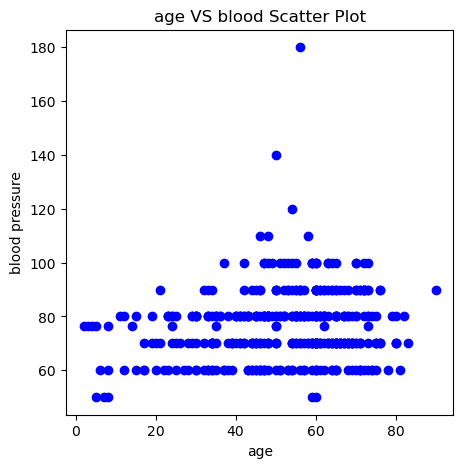

In [ ]:
import matplotlib.pyplot as plt # import the matplotlib libaray
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y-axis
plt.title("age VS blood Scatter Plot") #set a title for the axes

Age vs all continous columns

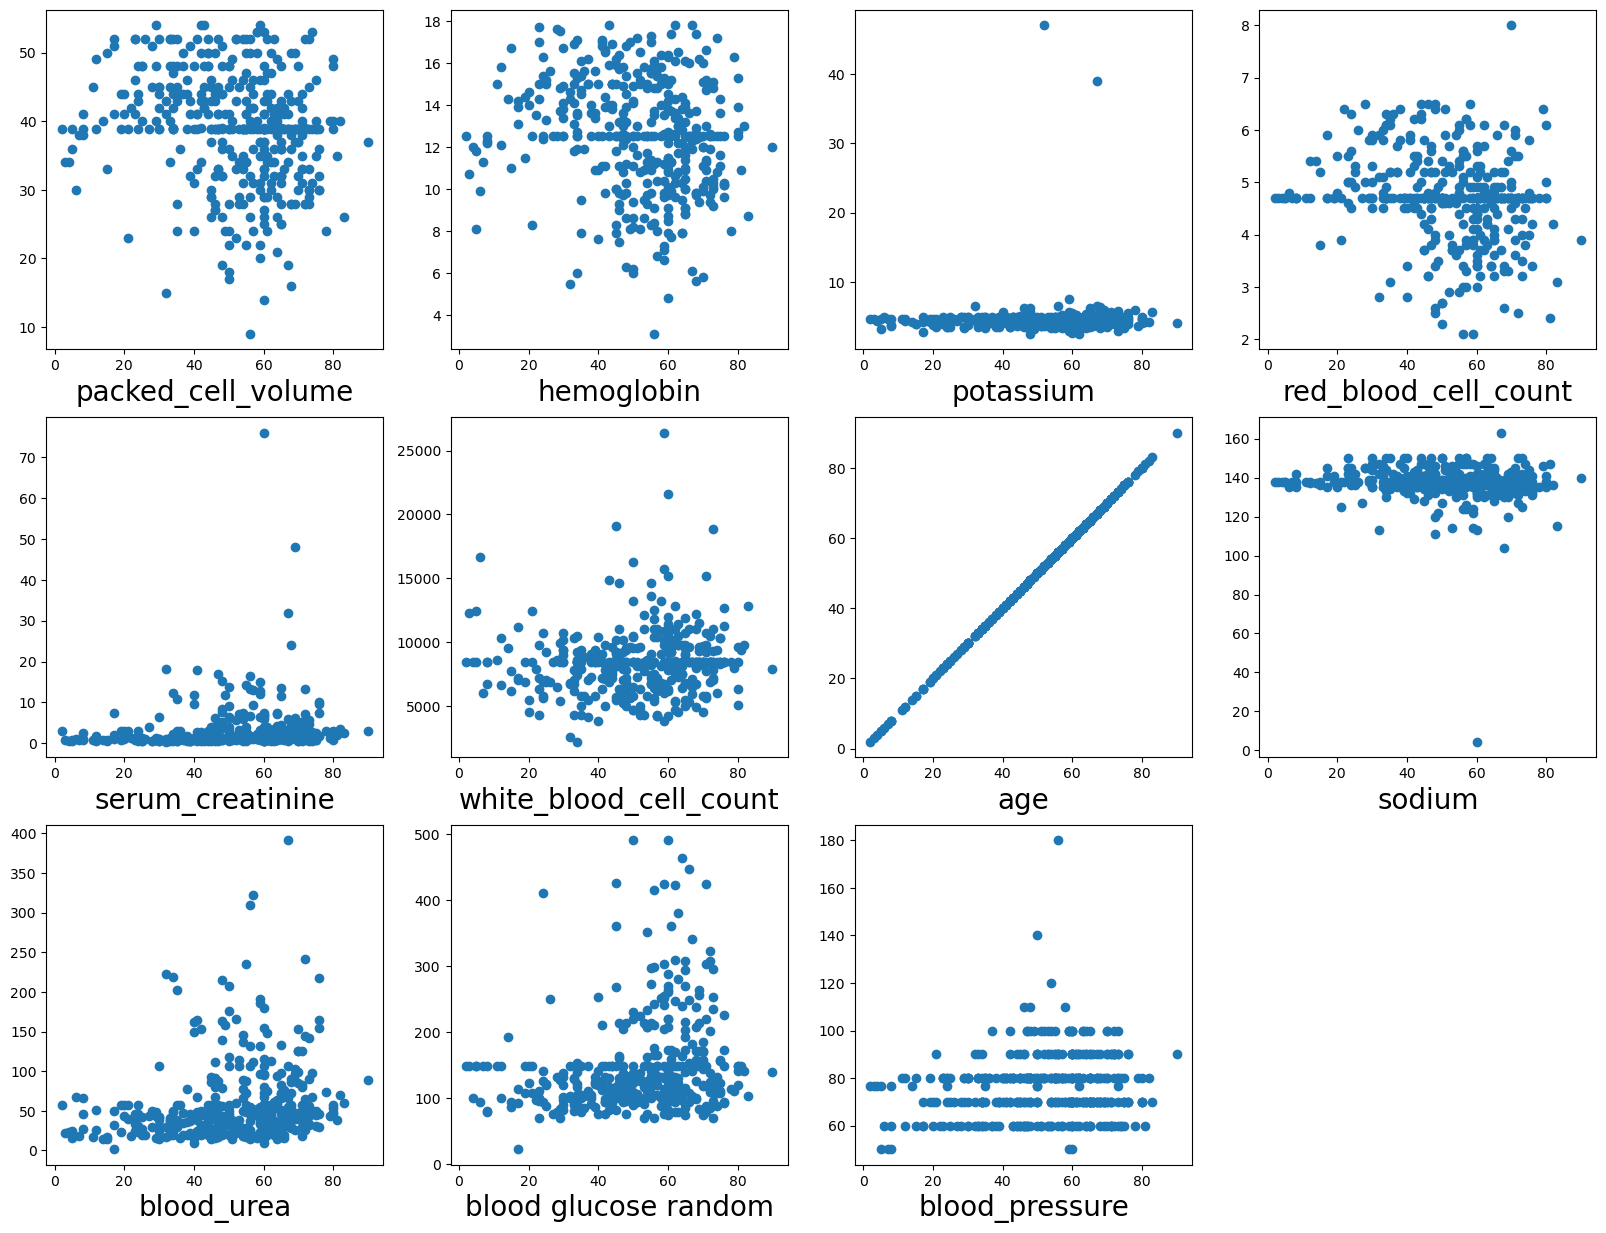

In [ ]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11 :     # as there are 11 continous columns in the data
        ax = plt.subplot(3,4,plotnumber) # 3,4 is refer to 3X4 matrix
        plt.scatter(data['age'],data[column]) #plotting scatter plot
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Finding correlation between the independent Columns

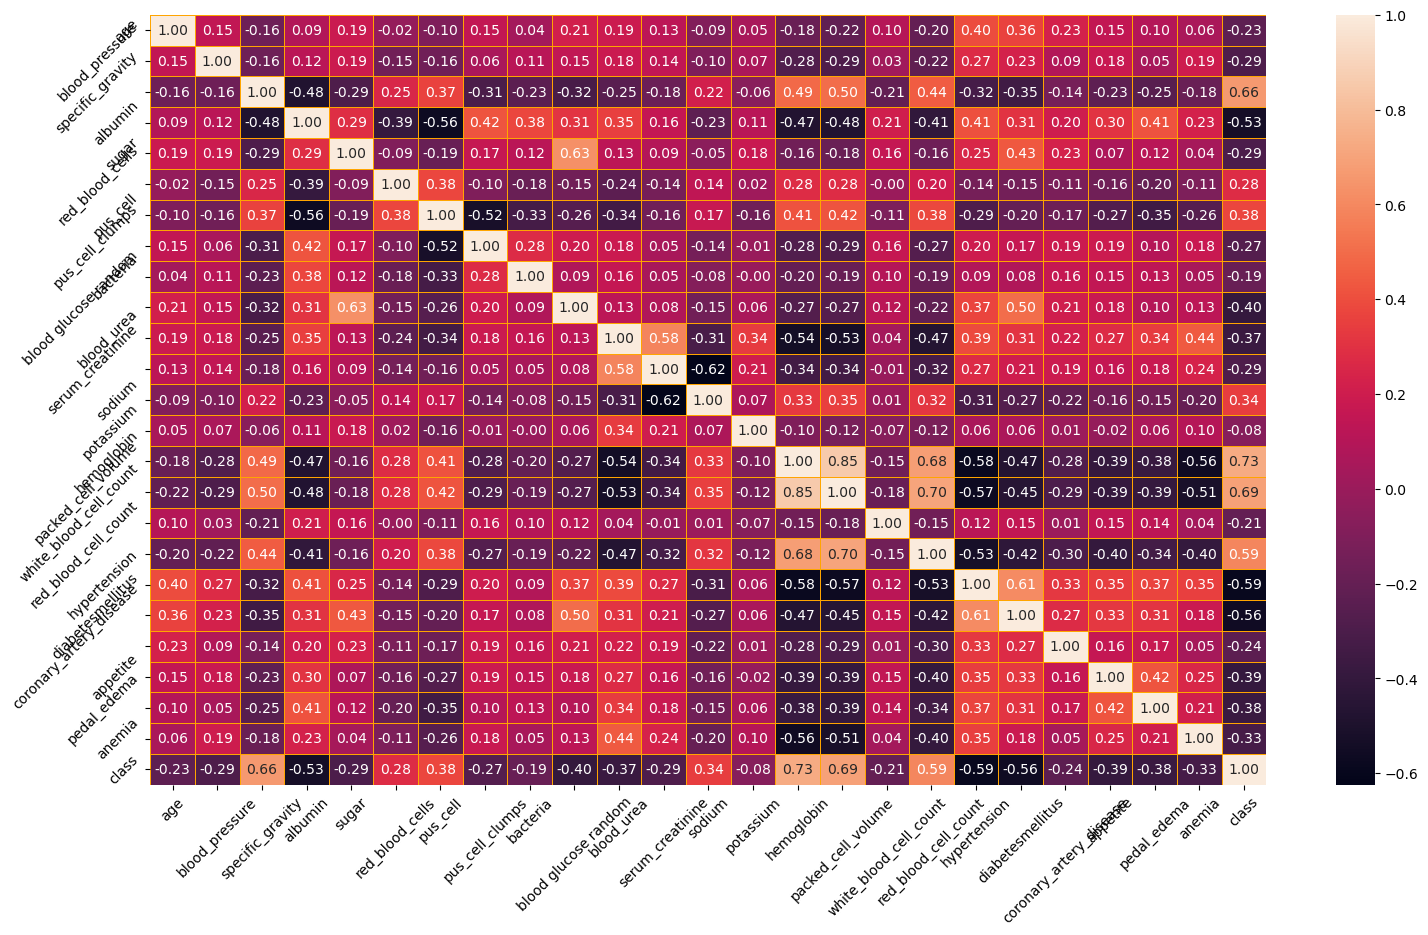

In [ ]:
#HEAT MAP #correlation of parameters
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Correlation of features with target variable

In [ ]:
correlation_matrix = data.corr()
target_correlations = correlation_matrix['class']
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
print(sorted_correlations)

class                      1.000000
hemoglobin                 0.729628
packed_cell_volume         0.690060
specific_gravity           0.659504
red_blood_cell_count       0.590913
hypertension               0.590438
diabetesmellitus           0.559060
albumin                    0.531562
blood glucose random       0.401374
appetite                   0.393341
pus_cell                   0.375154
pedal_edema                0.375154
blood_urea                 0.372033
sodium                     0.342288
anemia                     0.325396
sugar                      0.294555
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.230926
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64


Class

<Axes: ylabel='count'>

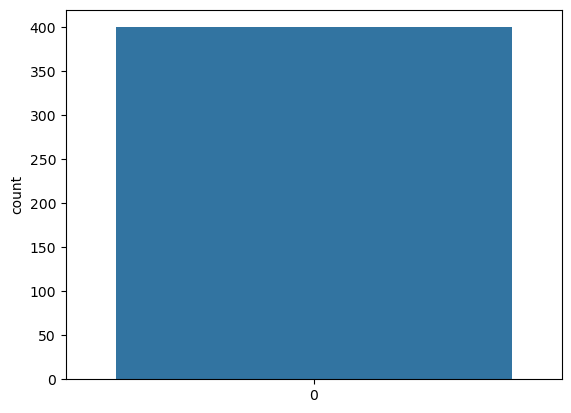

In [ ]:
sns.countplot(data['class'])

Creating Independent and Dependent

In [ ]:
selcols=['pus_cell', 'blood glucose random','blood_urea',
            'pedal_edema', 'anemia','diabetesmellitus','hypertension',
         'hemoglobin','specific_gravity','packed_cell_volume','red_blood_cell_count','appetite']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 12)
(400, 1)


Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)#train test split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 12)
(320, 1)
(80, 12)
(80, 1)


**Building a Machine Learning Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicting our output with the model which we build

In [ ]:
y_pred = lgr.predict(x_test)
print(y_pred)
c(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 0]


Counter({0: 52, 1: 28})

In [ ]:
print(y_pred.shape)

(80,)


In [ ]:
accuracy_score(y_test,y_pred)

0.975

Confustion Matrix of our model

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[52,  2],
       [ 0, 26]], dtype=int64)

# Using KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
knn.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
pred=knn.predict(x_test)
print(pred)
c(pred)

[0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 0]


Counter({0: 49, 1: 31})

In [ ]:
accuracy_score(y_test,pred)

0.9125

# Using Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
new_pred=nb.predict(x_test)
print(new_pred)
c(new_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0]


Counter({0: 49, 1: 31})

In [ ]:
accuracy_score(y_test,new_pred)

0.9375

Hence we performed 3 various Algorithms(Logistic Regression, K-nearest neighbour, Navie Bayes) the Logistic Regression has highest accuracy. So Lgr model is better to perform prediction analysis

Saving the Lgr model in pickle file

In [ ]:
pickle.dump(lgr,open("CKD.pkl","wb"))